# Gradient Boosting Regressor Model Testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

sns.set_style("whitegrid")

## Caricamento dei dati

In [ ]:
train_path = 'dataset/csv/train_Airbnb_Napoli.csv'
test_path = 'dataset/csv/test_Airbnb_Napoli.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"Train: {len(train_df)}")
print(f"Test: {len(test_df)}")

Train: 7753
Test: 1939


## Preparazione dei dati - Trasformazione logaritmica

In [ ]:
target_col = 'price'

X_train = train_df.drop(columns=[target_col], errors='ignore')
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col], errors='ignore')
y_test = test_df[target_col]

y_train_log = np.log1p(y_train)

## Gradient Boosting Regressor Model Training

In [18]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train_log)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

## Gradient Boosting Regressor Model Testing

In [19]:
preds_log = gbr.predict(X_test)
preds = np.expm1(preds_log)

r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"R2 Score: {r2:.4f}")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")

R2 Score: 0.6018
MAE: $21.71
RMSE: $40.50


## Visualizzazione delle predizioni vs valori effettivi

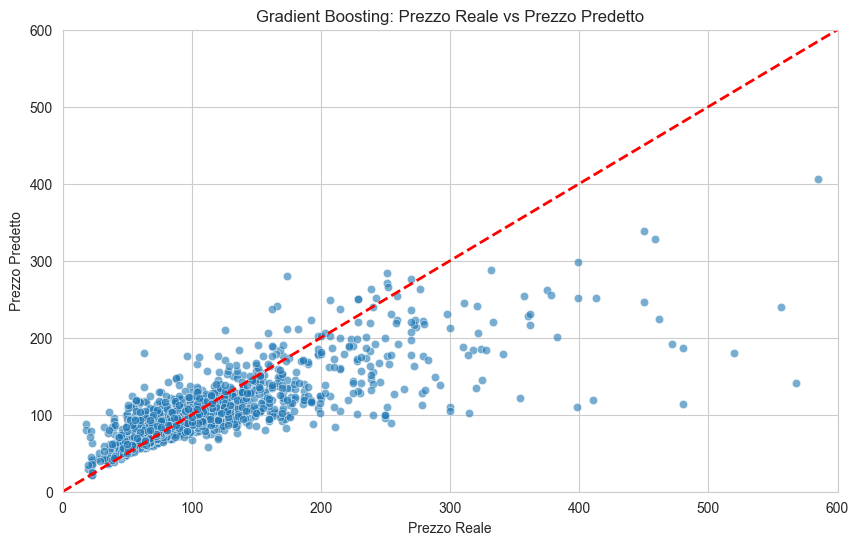

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([0, 600], [0, 600], 'r--', lw=2)
plt.xlabel('Prezzo Reale')
plt.ylabel('Prezzo Predetto')
plt.title('Gradient Boosting: Prezzo Reale vs Prezzo Predetto')
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.show()

## Analisi dell'importanza delle features

In [22]:
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(20))

estimated_revenue_l365d      0.241970
estimated_occupancy_l365d    0.123915
bathrooms                    0.120025
accommodates                 0.116705
latitude                     0.060566
bedrooms                     0.052697
reviews_per_month            0.052659
room_type_Shared room        0.042634
days_since_last_review       0.026880
host_listings_count          0.026804
longitude                    0.021344
instant_bookable_t           0.017071
minimum_nights_avg_ntm       0.014230
review_scores_value          0.013136
host_total_listings_count    0.012833
review_scores_rating         0.011200
number_of_reviews_ltm        0.009020
review_scores_location       0.007619
number_of_reviews            0.007079
availability_365             0.006010
dtype: float64
